# NBA vs NFL Subreddit Part 2 - Preprocessing and Modeling
---

_Author: Matthew Hill_

### Imports
---

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from nltk.stem import WordNetLemmatizer

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### _Subset for Model_
---

In [27]:
df = pd.read_csv('../Data/nbavsnfl')

In [28]:
df.head(3)

,Unnamed: 0,subreddit,selftext,title
0,0,1,NaN,2022-23 Lakers Season Begins — Narrated by LeB...
1,1,1,[deleted],[C.J. Holmes] Klay Thompson said he has no int...
2,2,1,NaN,[Wojnarowski] Fanatics CEO Michael Rubin compl...


##### Drop 'Unnamed: 0' columns
---

In [29]:
df.drop(columns=['Unnamed: 0', 'selftext'], inplace = True)

In [30]:
df.head()

,subreddit,title
0,1,2022-23 Lakers Season Begins — Narrated by LeB...
1,1,[C.J. Holmes] Klay Thompson said he has no int...
2,1,[Wojnarowski] Fanatics CEO Michael Rubin compl...
3,1,[Wojnarowski] Fanatics CEO Michael Rubin compl...
4,1,[Wojnarowski] ESPN Sources: Fanatics CEO Micha...


# Preprocessing and Modeling
---

### OLS Train/Test Split Model

In [31]:
X = df['title']
y = df['subreddit']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [33]:
y.value_counts(normalize = True)

0    0.500751
1    0.499249
Name: subreddit, dtype: float64

In [34]:
cvec = CountVectorizer()

In [35]:
cvec.fit(X_train)

CountVectorizer()

In [36]:
X_train = cvec.transform(X_train)

In [37]:
X_test = cvec.transform(X_test)

In [38]:
X_train.shape

(1497, 4424)

In [39]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [40]:
X_train.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [41]:
cvec.get_feature_names()

/Users/dimarhill/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '0216a7877976',
 '04',
 '06',
 '07',
 '08',
 '09',
 '10',
 '100',
 '1000th',
 '102',
 '103',
 '105',
 '106',
 '107',
 '108',
 '1080p',
 '109',
 '1098',
 '10million',
 '10pts',
 '10th',
 '11',
 '110',
 '111',
 '112',
 '114',
 '115',
 '116',
 '117',
 '119',
 '11pts',
 '12',
 '120',
 '121',
 '122',
 '125',
 '1265',
 '128',
 '12p',
 '13',
 '130',
 '132',
 '137',
 '1396',
 '13th',
 '14',
 '141',
 '144',
 '14k',
 '14kprize',
 '15',
 '1583664010733400064',
 '1583874355439710208',
 '16',
 '16p',
 '16th',
 '17',
 '18',
 '18td',
 '19',
 '1936',
 '1969',
 '1977',
 '1982',
 '1984',
 '1987',
 '1990',
 '1993',
 '1994',
 '19pts',
 '1a',
 '1blk',
 '1k',
 '1st',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024',
 '2027',
 '2029',
 '2093',
 '20k',
 '20td',
 '20th',
 '21',
 '2159',
 '21st',
 '22',
 '222',
 '226',
 '23'

In [42]:
X_train_df = pd.DataFrame(X_train.todense(), 
                          columns=cvec.get_feature_names())

#### Top 10 Words including Stop Words

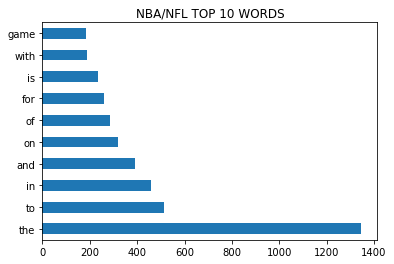

In [43]:
X_train_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');
plt.title('NBA/NFL TOP 10 WORDS');

### OLS Train/Test Split Model Excluding Stop Words

In [44]:
print(CountVectorizer(stop_words = 'english').get_stop_words())

frozenset({'while', 'less', 'co', 'this', 'via', 'fifteen', 'ltd', 'might', 'rather', 'most', 'serious', 'part', 'six', 'same', 'per', 'up', 'seem', 'latterly', 'mill', 'well', 'of', 'their', 'afterwards', 'although', 'from', 'either', 'sixty', 'five', 'us', 'themselves', 'through', 'over', 'mostly', 'or', 'next', 'would', 'our', 'whence', 'de', 'had', 'twenty', 'already', 'get', 'go', 'you', 'somewhere', 'put', 'behind', 'anywhere', 'beyond', 'such', 'also', 'once', 'in', 'it', 'is', 'whom', 'done', 'three', 'couldnt', 'to', 'almost', 'until', 'someone', 'him', 'by', 'here', 'seeming', 'other', 'last', 'between', 'its', 'his', 'down', 'since', 'keep', 'where', 'full', 'could', 'further', 'a', 'eg', 'under', 'because', 'sometimes', 'becomes', 'anyone', 'only', 'twelve', 'throughout', 'except', 'below', 'were', 'nor', 'however', 'ours', 'may', 'been', 'though', 'enough', 'latter', 'your', 'which', 'no', 'ten', 'move', 'was', 'hereupon', 'yourself', 'hers', 'none', 'seems', 'my', 'myself

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [46]:
# Instantiate (w/ Stop Words)
cvec = CountVectorizer(stop_words = 'english')

#Fit
cvec.fit(X_train)

#Transform
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)

In [47]:
X_train_df = pd.DataFrame(X_train.todense(), 
                          columns=cvec.get_feature_names())

/Users/dimarhill/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Top 10 Words Excluding Stop Words 

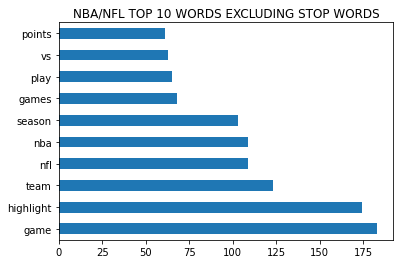

In [48]:
X_train_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');
plt.title('NBA/NFL TOP 10 WORDS EXCLUDING STOP WORDS');

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [50]:
# Instantiate (w/ ngrams)
cvec = CountVectorizer(stop_words = 'english', ngram_range = (2,2))

#Fit
cvec.fit(X_train)

#Transform
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)

In [51]:
X_train_df = pd.DataFrame(X_train.todense(), 
                          columns=cvec.get_feature_names())

/Users/dimarhill/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Top 10 Words Excluding Stop Words & Only 2 word phrases

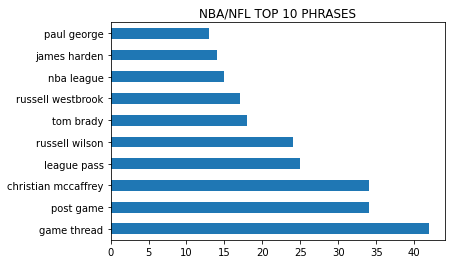

In [52]:
X_train_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');
plt.title('NBA/NFL TOP 10 PHRASES');

# Modeling

####  Redefined training and testing sets

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

#### Baseline accuracy

In [54]:
y_test.value_counts(normalize = True)

1    0.5
0    0.5
Name: subreddit, dtype: float64

In [55]:
cvec = CountVectorizer()

### Naive Bayes

In [56]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [57]:
pipe_params = {
    'cvec__stop_words':[None, 'english'],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1, 2)]
}

In [58]:
gs = GridSearchCV(pipe,
                 param_grid = pipe_params, 
                  cv = 5) 

In [59]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95], 'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english']})

In [60]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

In [61]:
gs.score(X_test, y_test)

0.908

In [62]:
gs.score(X_train, y_train)

0.9659318637274549

/Users/dimarhill/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


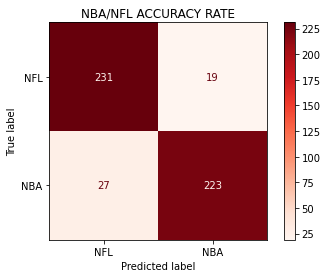

In [89]:
plot_confusion_matrix(gs, X_test, y_test, cmap='Reds', values_format='d', display_labels=['NFL', 'NBA']);
plt.title('NBA/NFL ACCURACY RATE');

- 231/250 True/Positive for NFL
- 223/260 True/Positive for NBA

### Logistic Regression

In [64]:
pipe2 = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg',LogisticRegression(penalty='none'))
])

In [65]:
pipe_params = {
    'cvec__stop_words':[None, 'english'],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1, 2)]
}

In [66]:
gs2 = GridSearchCV(pipe2, # what object are we optimizing?
                 param_grid = pipe_params, # what parameters values are we searching?
                  cv = 5) # 5-fold cross-validation.

In [67]:
gs2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logreg',
                                        LogisticRegression(penalty='none'))]),
             param_grid={'cvec__max_df': [0.9, 0.95], 'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english']})

In [68]:
gs2.best_params_

{'cvec__max_df': 0.9,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None}

In [69]:
gs2.score(X_test, y_test)

0.892

In [70]:
gs2.score(X_train, y_train)

0.9959919839679359

/Users/dimarhill/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


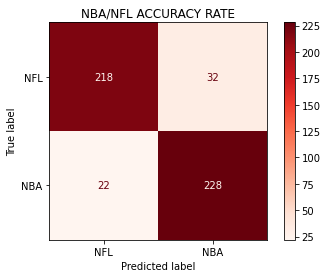

In [90]:
plot_confusion_matrix(gs2, X_test, y_test, cmap='Reds', values_format='d', display_labels=['NFL', 'NBA']);
plt.title('NBA/NFL ACCURACY RATE');

- 218/250 True/Positive for NFL
- 228/250 True/Positive for NBA

# Randon Forest

In [100]:
rfc = RandomForestClassifier()

In [101]:
pipe3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('rfc',RandomForestClassifier())
])

In [102]:
pipe_params = {
    'cvec__stop_words':[None, 'english'],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1, 2)]
}

In [103]:
gs3 = GridSearchCV(pipe3, # what object are we optimizing?
                 param_grid = pipe_params, # what parameters values are we searching?
                  cv = 5) # 5-fold cross-validation.

In [104]:
gs3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'cvec__max_df': [0.9, 0.95], 'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english']})

In [105]:
gs3.best_params_

{'cvec__max_df': 0.95,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

In [106]:
gs3.score(X_test, y_test)

0.856

In [107]:
gs3.score(X_train, y_train)

0.9953239812959251

/Users/dimarhill/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


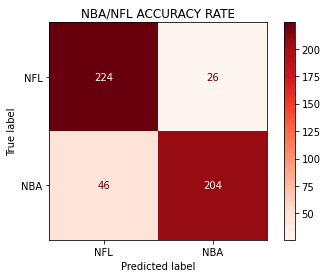

In [108]:
plot_confusion_matrix(gs3, X_test, y_test, cmap='Reds', values_format='d', display_labels=['NFL', 'NBA']);
plt.title('NBA/NFL ACCURACY RATE');

- 224/250 True/Positive for NFL
- 204/250 True/Positive for NBA

# Naive Bayes has the best Score